# EDA

https://cogcomp.seas.upenn.edu/Data/QA/QC/definition.html                                        
https://cogcomp.seas.upenn.edu/Data/QA/QC/train_5500.label                                               
https://cogcomp.seas.upenn.edu/Data/QA/QC/TREC_10.label

In [1]:
#petras_path for plots 
#path_plot = '/home/petra42/AIDA_Abschluss/aida_question_classification/plots/'
path_plot = '/home/an/aida_question_classification/plots/'

## Libaries

In [2]:
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def process_question(row):
   return " ".join(row.split(" ")[1:])

train_df = pd.read_table("https://cogcomp.seas.upenn.edu/Data/QA/QC/train_5500.label", encoding = "ISO-8859-1", header=None)
train_df.columns = ["raw"]
train_df['category'] = train_df.apply (lambda row: row["raw"].split(":")[0], axis=1)
train_df['subcategory'] = train_df.apply (lambda row: row["raw"].split(" ")[0].split(":")[1], axis=1)
train_df['question'] = train_df.apply (lambda row: process_question(row["raw"]), axis=1)

train_df

,raw,category,subcategory,question
0,DESC:manner How did serfdom develop in and the...,DESC,manner,How did serfdom develop in and then leave Russ...
1,ENTY:cremat What films featured the character ...,ENTY,cremat,What films featured the character Popeye Doyle ?
2,DESC:manner How can I find a list of celebriti...,DESC,manner,How can I find a list of celebrities ' real na...
3,ENTY:animal What fowl grabs the spotlight afte...,ENTY,animal,What fowl grabs the spotlight after the Chines...
4,ABBR:exp What is the full form of .com ?,ABBR,exp,What is the full form of .com ?
...,...,...,...,...
5447,ENTY:other What 's the shape of a camel 's spi...,ENTY,other,What 's the shape of a camel 's spine ?
5448,ENTY:currency What type of currency is used in...,ENTY,currency,What type of currency is used in China ?
5449,NUM:temp What is the temperature today ?,NUM,temp,What is the temperature today ?
5450,NUM:temp What is the temperature for cooking ?,NUM,temp,What is the temperature for cooking ?


In [4]:
test_df = pd.read_table("https://cogcomp.seas.upenn.edu/Data/QA/QC/TREC_10.label", encoding = "ISO-8859-1", header=None)
test_df.columns = ["raw"]
test_df['category'] = train_df.apply (lambda row: row["raw"].split(":")[0], axis=1)
test_df['subcategory'] = train_df.apply (lambda row: row["raw"].split(" ")[0].split(":")[1], axis=1)
test_df['question'] = train_df.apply (lambda row: process_question(row["raw"]), axis=1)

test_df

,raw,category,subcategory,question
0,NUM:dist How far is it from Denver to Aspen ?,DESC,manner,How did serfdom develop in and then leave Russ...
1,"LOC:city What county is Modesto , California in ?",ENTY,cremat,What films featured the character Popeye Doyle ?
2,HUM:desc Who was Galileo ?,DESC,manner,How can I find a list of celebrities ' real na...
3,DESC:def What is an atom ?,ENTY,animal,What fowl grabs the spotlight after the Chines...
4,NUM:date When did Hawaii become a state ?,ABBR,exp,What is the full form of .com ?
...,...,...,...,...
495,HUM:ind Who was the 22nd President of the US ?,ENTY,cremat,What is the Jewish bible called ?
496,ENTY:currency What is the money they use in Za...,DESC,reason,Why is the grass green ?
497,NUM:count How many feet in a mile ?,DESC,def,What is a firewall ?
498,ENTY:substance What is the birthstone of Octob...,HUM,ind,What spy novelist served as Moscow corresponde...


In [5]:
train_df.head(5)

#describe
train_df.describe()
test_df.describe()

,raw,category,subcategory,question
count,500,500,500,500
unique,500,6,38,498
top,DESC:def What is bangers and mash ?,ENTY,ind,What is the speed of the Mississippi River ?
freq,1,113,84,3



## question:
    - shape 
    - size
    - info: 
        count: row, unique categories, subcategories
    - witch catagories, subcategories, same in both dataframes
    - distribution
    - len questions (count token)
    

 

In [6]:
# print test, train shape
print(f'---shapes---\ntrain:\t{train_df.shape}\ntest:\t{test_df.shape}')

---shapes---
train:	(5452, 4)
test:	(500, 4)


In [7]:
# number of row of columns
print(f'train_size:\t{train_df.size}\ntest_size:\t{test_df.size}') 

train_size:	21808
test_size:	2000


In [8]:
# line occupancy    
print(f'---train---:\n {train_df.nunique()}\n')
print(f'---test---:\n {test_df.nunique()}')

---train---:
 raw            5382
category          6
subcategory      47
question       5381
dtype: int64

---test---:
 raw            500
category         6
subcategory     38
question       498
dtype: int64


In [9]:
#which categories?
print(f"unique categories: {train_df['category'].unique()}")
#same categories in train and test?
train_df['category'].unique() == test_df['category'].unique()


unique categories: ['DESC' 'ENTY' 'ABBR' 'HUM' 'NUM' 'LOC']


array([ True,  True,  True,  True,  True,  True])

In [10]:
# load dictionary as dict
#which categories are not used?.
#which categories are used in train and test?

print(f"unique subcategories: {train_df['subcategory'].unique()}")





unique subcategories: ['manner' 'cremat' 'animal' 'exp' 'ind' 'gr' 'title' 'def' 'date' 'reason'
 'event' 'state' 'desc' 'count' 'other' 'letter' 'religion' 'food'
 'country' 'color' 'termeq' 'city' 'body' 'dismed' 'mount' 'money'
 'product' 'period' 'substance' 'sport' 'plant' 'techmeth' 'volsize'
 'instru' 'abb' 'speed' 'word' 'lang' 'perc' 'code' 'dist' 'temp' 'symbol'
 'ord' 'veh' 'weight' 'currency']


category
ABBR      86
DESC    1162
ENTY    1250
HUM     1223
LOC      835
NUM      896
Name: subcategory, dtype: int64


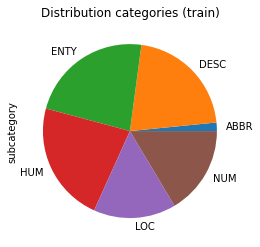

In [11]:
# distribution categories (train)
dist_train_cat = train_df.groupby('category')['subcategory'].count()
print(dist_train_cat)
dist_train_cat.sort_values(ascending=False)

#visualisation 
dist_train_cat.plot.pie()
plt.title('Distribution categories (train)')
plt.savefig(path_plot + 'Distribution_categories_train.png')
plt.show()


In [12]:
type(dist_train_cat)
dist_train_cat.values

array([  86, 1162, 1250, 1223,  835,  896])

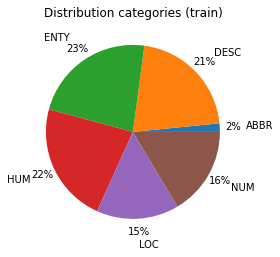

In [13]:
plt.pie(dist_train_cat,labels=dist_train_cat.index, autopct='%1.0f%%', pctdistance=1.15, labeldistance=1.3) 
plt.title('Distribution categories (train)')
plt.savefig(path_plot + 'Distribution_categories_train%.png')
plt.show()

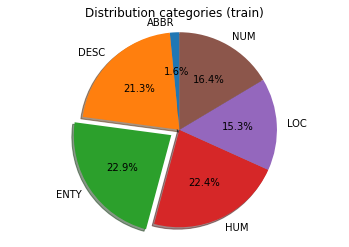

In [14]:
# Pie chart, where the slices will show the max_category:
labels=dist_train_cat.index
sizes = dist_train_cat
explode = (0, 0, 0.1, 0, 0, 0)  # only "explode" the 3nd slice (max_category)

fig1, ax1 = plt.subplots()
ax1.pie(dist_train_cat, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution categories (train)')
plt.savefig(path_plot + 'Distribution_categories_train_slice.png')
plt.show()

category
ABBR     11
DESC    113
ENTY    113
HUM     110
LOC      78
NUM      75
Name: subcategory, dtype: int64


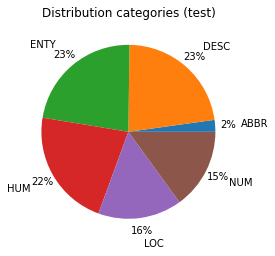

In [15]:
# distribution categories (test)
dist_test_cat = test_df.groupby('category')['subcategory'].count()
dist_test_cat.sort_values(ascending=False)
print(dist_test_cat)

plt.pie(dist_test_cat,labels=dist_test_cat.index, autopct='%1.0f%%', pctdistance=1.15, labeldistance=1.3) 
plt.title('Distribution categories (test)')
plt.savefig(path_plot + 'Distribution_categories_test%.png')
plt.show()

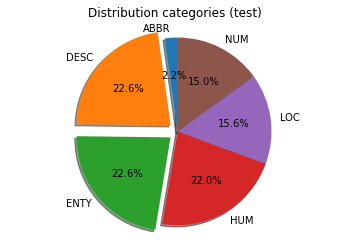

In [16]:
# Pie chart, where the slices will show the max_categories:
labels=dist_test_cat.index
explode = (0, 0.1, 0.1, 0, 0, 0)  # only "explode" the slice (max_categories)

fig1, ax1 = plt.subplots()
ax1.pie(dist_test_cat, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution categories (test)')
plt.savefig(path_plot + 'Distribution_categories_test_slice.png')
plt.show()

In [17]:
# distribution subcategories (train)
dist_train_sub = train_df.subcategory.groupby(train_df['category']).value_counts()
print(dist_train_sub)

category  subcategory
ABBR      exp             70
          abb             16
DESC      def            421
          manner         276
          desc           274
          reason         191
ENTY      other          217
          cremat         207
          animal         112
          dismed         103
          food           103
          termeq          93
          sport           62
          event           56
          product         42
          substance       41
          color           40
          techmeth        38
          veh             27
          word            26
          body            16
          lang            16
          plant           13
          symbol          11
          instru          10
          letter           9
          currency         4
          religion         4
HUM       ind            962
          gr             189
          desc            47
          title           25
LOC       other          464
          country    

In [18]:
#first 20 subcategories
print(f'first 20: {dist_train_sub.sort_values(ascending=False)[:20]}')

first 20: category  subcategory
HUM       ind            962
LOC       other          464
DESC      def            421
NUM       count          363
DESC      manner         276
          desc           274
NUM       date           218
ENTY      other          217
          cremat         207
DESC      reason         191
HUM       gr             189
LOC       country        155
          city           129
ENTY      animal         112
          dismed         103
          food           103
          termeq          93
NUM       period          75
          money           71
ABBR      exp             70
Name: subcategory, dtype: int64


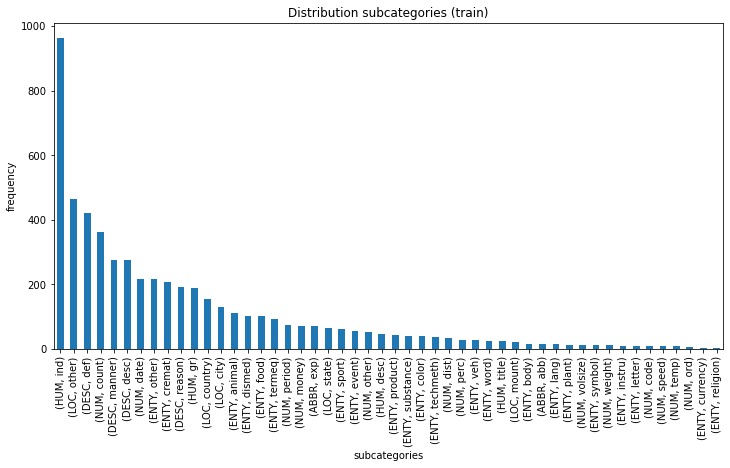

In [19]:
fig= plt.figure(figsize=(12,6))
dist_train_sub.sort_values(ascending=False).plot.bar(label='train')
plt.xlabel('subcategories')
plt.ylabel('frequency')
plt.title('Distribution subcategories (train)')
plt.savefig(path_plot + 'Distribution_subcategories_train.png')
plt.show()

In [20]:
# distribution subcategories (test)
dist_test_sub = test_df.subcategory.groupby(test_df['category']).value_counts()
print(dist_test_sub)


category  subcategory
ABBR      exp             9
          abb             2
DESC      def            40
          manner         29
          desc           23
          reason         21
ENTY      other          22
          cremat         21
          animal         16
          food            7
          termeq          7
          dismed          6
          techmeth        6
          body            5
          event           5
          color           3
          product         3
          sport           3
          instru          2
          substance       2
          lang            1
          letter          1
          plant           1
          religion        1
          word            1
HUM       ind            84
          gr             21
          desc            3
          title           2
LOC       other          41
          city           12
          country        12
          state           8
          mount           5
NUM       count          3

In [21]:
print(f'first 20: {dist_train_sub.sort_values(ascending=False)[:20]}')

first 20: category  subcategory
HUM       ind            962
LOC       other          464
DESC      def            421
NUM       count          363
DESC      manner         276
          desc           274
NUM       date           218
ENTY      other          217
          cremat         207
DESC      reason         191
HUM       gr             189
LOC       country        155
          city           129
ENTY      animal         112
          dismed         103
          food           103
          termeq          93
NUM       period          75
          money           71
ABBR      exp             70
Name: subcategory, dtype: int64


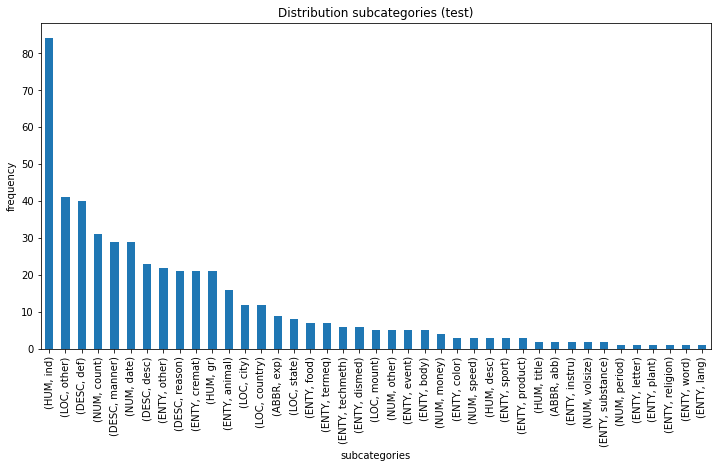

In [22]:
plt.figure(figsize=(12,6))
dist_test_sub.sort_values(ascending=False).plot.bar(label='test')
plt.xlabel('subcategories')
plt.ylabel('frequency')
plt.title('Distribution subcategories (test)')
plt.savefig(path_plot + 'Distribution_subcategories_test.png')
plt.show()

In [23]:
#plt.gca().set_xticklabels(xtickvals[::6], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})

In [24]:
#test_df with only 38 subcategories compared to 47 in train_df
n = 14   #input for nlargest
train_df.subcategory.value_counts().nlargest(n).sum()

p = (train_df.subcategory.value_counts().nlargest(n).sum())/len(train_df)
print(f'The {n} largest subcategories account for a proportion of {p}')

The 14 largest subcategories account for a proportion of 0.8033749082905356


In [25]:
train_df.subcategory.value_counts().nlargest(n)

top_subcategories = list((train_df.subcategory.value_counts().nlargest(n)).index)
top_subcategories

train_df_top = train_df.loc[train_df['subcategory'].isin(top_subcategories)]
print(f'The {n} largest subcategories have {len(train_df_top)} questions.')

The 14 largest subcategories have 4380 questions.


In [26]:
train_df_top.sample(10)
train_df_top.subcategory.groupby(train_df['category']).value_counts()

#More than 80% of the data can be assigned to only 14 out of 47 subcategories in train_df

test_df.subcategory.value_counts().nlargest(39)

ind          84
other        68
def          40
count        31
manner       29
date         29
desc         26
cremat       21
reason       21
gr           21
animal       16
country      12
city         12
exp           9
state         8
food          7
termeq        7
dismed        6
techmeth      6
body          5
mount         5
event         5
money         4
speed         3
product       3
color         3
sport         3
substance     2
instru        2
title         2
volsize       2
abb           2
lang          1
religion      1
word          1
plant         1
period        1
letter        1
Name: subcategory, dtype: int64

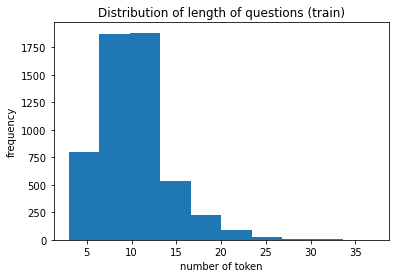

In [27]:
#len text
plt.hist(train_df['question'].apply(lambda text: len(text.split())))
plt.xlabel('number of token')
plt.ylabel('frequency')
plt.title('Distribution of length of questions (train)')
plt.savefig(path_plot + 'length_questions_train.png')
plt.show()

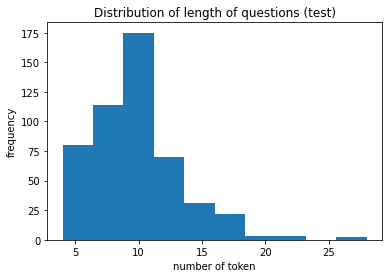

In [28]:
#len text in test_df.question
plt.hist(test_df['question'].apply(lambda text: len(text.split())))
plt.xlabel('number of token')
plt.ylabel('frequency')
plt.title('Distribution of length of questions (test)')
plt.savefig(path_plot + 'length_questions_test.png')
plt.show()

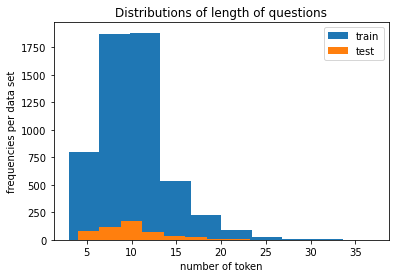

In [29]:
ax1 = plt.hist(train_df['question'].apply(lambda text: len(text.split())),label='train')
ax2 = plt.hist(test_df['question'].apply(lambda text: len(text.split())), label='test')
plt.legend()
plt.xlabel('number of token')
plt.ylabel('frequencies per data set')
plt.title('Distributions of length of questions')
plt.savefig(path_plot + 'length_questions.png')
plt.show()

In [30]:
#average length of question
al_train = round(train_df['question'].apply(lambda text: len(text.split())).mean())
al_test = round(test_df['question'].apply(lambda text: len(text.split())).mean())
print(f'The questions in the train data set have an average of {al_train} tokens,\
 and {al_test} tokens in the test data set.')

The questions in the train data set have an average of 10 tokens, and 10 tokens in the test data set.


In [31]:
train_question_df = train_df['question'].str.split(" ", expand=True)
train_question_df 

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,How,did,serfdom,develop,in,and,then,leave,Russia,?,...,None,None,None,None,None,None,None,None,None,None
1,What,films,featured,the,character,Popeye,Doyle,?,None,None,...,None,None,None,None,None,None,None,None,None,None
2,How,can,I,find,a,list,of,celebrities,',real,...,None,None,None,None,None,None,None,None,None,None
3,What,fowl,grabs,the,spotlight,after,the,Chinese,Year,of,...,None,None,None,None,None,None,None,None,None,None
4,What,is,the,full,form,of,.com,?,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5447,What,'s,the,shape,of,a,camel,'s,spine,?,...,None,None,None,None,None,None,None,None,None,None
5448,What,type,of,currency,is,used,in,China,?,None,...,None,None,None,None,None,None,None,None,None,None
5449,What,is,the,temperature,today,?,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5450,What,is,the,temperature,for,cooking,?,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [32]:
#percentage distribution of tokens (train)
for column in train_question_df.columns:
    nan_sum = train_question_df[column].isnull().sum()
    print(column,': ',round(100.00-(nan_sum*100/len(train_question_df)),2))

0 :  100.0
1 :  100.0
2 :  100.0
3 :  99.93
4 :  97.45
5 :  92.53
6 :  85.29
7 :  74.91
8 :  63.35
9 :  50.99
10 :  40.24
11 :  30.5
12 :  21.88
13 :  16.45
14 :  12.84
15 :  9.3
16 :  6.68
17 :  4.99
18 :  3.52
19 :  2.46
20 :  1.89
21 :  1.32
22 :  0.97
23 :  0.77
24 :  0.53
25 :  0.39
26 :  0.29
27 :  0.28
28 :  0.22
29 :  0.15
30 :  0.13
31 :  0.07
32 :  0.04
33 :  0.04
34 :  0.02
35 :  0.02
36 :  0.02


# Shrinkage of questions 


In [33]:


import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# default setting for lemmatizer and stopwords
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

# remove stop words
nltk.download('stopwords')
my_stopwords = set(stopwords.words('english'))


def clean_text(text):
    """
    Regex cleaning of the text. Filters everything except alphanumerical and '.
    Return is turned into lower case

    Parameters
    ----------
    text : string
        text to be cleaned

    Returns
    -------
    string
        lower case regex cleaned text

    """
    text = text.replace("´", "'")
    
    text = text.replace("'s", " ")

    digi_punct = "[^a-zA-Z.1234567890#' ]"
    text = re.sub(digi_punct, " ", text)
    text = " ".join(text.split())
    text = text.lower()
    return text



def stopword_text(text):
    """
    Remove all words in the text that are in the stopword list
     
    Parameters
    ----------
    text : string
    
    Returns
    -------
    string
        text only stopwords
     
    """

    return " ".join([word for word in text.split() if word not in my_stopwords])



def lem_text(text):
    """
    Group the different inflected forms of a word so they can be analysed as 
    a single item
     
    Parameters
    ----------
    text : string
    
    Returns
    -------
    string
        text with lemmas
    """

    lem_sentence = text.split()
    for i, word in enumerate(text.split()):
        for pos in "n", "v", "a", "r":
            lem = lemmatizer.lemmatize(word, pos=pos)
            if lem != word:
                lem_sentence[i] = lem
                break
            else:
                lem_sentence[i] = word
    return " ".join(lem_sentence)


[nltk_data] Downloading package wordnet to /home/an/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/an/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
train_df.head(2)

,raw,category,subcategory,question
0,DESC:manner How did serfdom develop in and the...,DESC,manner,How did serfdom develop in and then leave Russ...
1,ENTY:cremat What films featured the character ...,ENTY,cremat,What films featured the character Popeye Doyle ?


In [35]:
stopword_text('i you what How Why go me how to school')  
#Attention: question words in LOWER case are in stopwords, in UPPER case not !!!

'How Why go school'

In [36]:
# create corpus
def corpus_func(df):
    return "######".join(text for text in train_df['question'])

# corpus df_train['text']
corpus = corpus_func(train_df['question'])
print(corpus)

# create split-list corpus --> tranfer into DF

def corpus_list(corpus):
    corpus_list = lambda x: x.split('######')
#try
#test = corpus_list(corpus)

How did serfdom develop in and then leave Russia ?######What films featured the character Popeye Doyle ?######How can I find a list of celebrities ' real names ?######What fowl grabs the spotlight after the Chinese Year of the Monkey ?######What is the full form of .com ?######What contemptible scoundrel stole the cork from my lunch ?######What team did baseball 's St. Louis Browns become ?######What is the oldest profession ?######What are liver enzymes ?######Name the scar-faced bounty hunter of The Old West .######When was Ozzy Osbourne born ?######Why do heavier objects travel downhill faster ?######Who was The Pride of the Yankees ?######Who killed Gandhi ?######What is considered the costliest disaster the insurance industry has ever faced ?######What sprawling U.S. state boasts the most airports ?######What did the only repealed amendment to the U.S. Constitution deal with ?######How many Jews were executed in concentration camps during WWII ?######What is `` Nine Inch Nails '' 

In [37]:
text_corpus = stopword_text(corpus) 

In [38]:
clean_text(text_corpus)

"how serfdom develop leave russia ######what films featured character popeye doyle ######how i find list celebrities ' real names ######what fowl grabs spotlight chinese year monkey ######what full form .com ######what contemptible scoundrel stole cork lunch ######what team baseball st. louis browns become ######what oldest profession ######what liver enzymes ######name scar faced bounty hunter the old west .######when ozzy osbourne born ######why heavier objects travel downhill faster ######who the pride yankees ######who killed gandhi ######what considered costliest disaster insurance industry ever faced ######what sprawling u.s. state boasts airports ######what repealed amendment u.s. constitution deal ######how many jews executed concentration camps wwii ######what nine inch nails '' ######what annotated bibliography ######what date boxing day ######what articles clothing tokens monopoly ######name 11 famous martyrs .######what olympic motto ######what origin name scarlett ' ######

In [39]:
stopword_text("why is Peter 's go")

"Peter 's go"

In [40]:
train_df['text'] = text_corpus.split('######')      #text column generated from question deleting stopwords
train_df.head(2)


,raw,category,subcategory,question,text
0,DESC:manner How did serfdom develop in and the...,DESC,manner,How did serfdom develop in and then leave Russ...,How serfdom develop leave Russia ?
1,ENTY:cremat What films featured the character ...,ENTY,cremat,What films featured the character Popeye Doyle ?,What films featured character Popeye Doyle ?


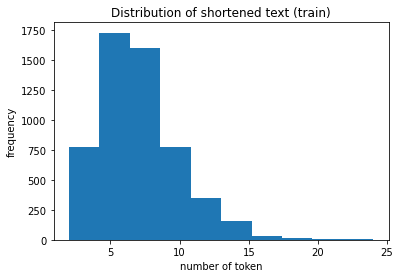

In [41]:
#len text
plt.hist(train_df['text'].apply(lambda text: len(text.split())))
#plt.hist(train_df['question'].apply(lambda text: len(text.split())))
plt.xlabel('number of token')
plt.ylabel('frequency')
plt.title('Distribution of shortened text (train)')
#plt.legend
plt.savefig(path_plot + 'length_short_text_train.png')
plt.show()

In [42]:
train_text_df = train_df['text'].str.split(" ", expand=True)
train_text_df 

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,How,serfdom,develop,leave,Russia,?,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,What,films,featured,character,Popeye,Doyle,?,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,How,I,find,list,celebrities,',real,names,?,None,...,None,None,None,None,None,None,None,None,None,None
3,What,fowl,grabs,spotlight,Chinese,Year,Monkey,?,None,None,...,None,None,None,None,None,None,None,None,None,None
4,What,full,form,.com,?,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5447,What,'s,shape,camel,'s,spine,?,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5448,What,type,currency,used,China,?,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5449,What,temperature,today,?,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5450,What,temperature,cooking,?,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [43]:
#percentage distribution of tokens (train)
for column in train_text_df.columns:
    nan_sum = train_text_df[column].isnull().sum()
    print(column,': ',round(100.00-(nan_sum*100/len(train_text_df)),2))

0 :  100.0
1 :  100.0
2 :  99.96
3 :  96.79
4 :  85.73
5 :  70.38
6 :  54.04
7 :  36.92
8 :  24.63
9 :  16.09
10 :  10.44
11 :  6.9
12 :  4.05
13 :  2.77
14 :  1.76
15 :  1.12
16 :  0.66
17 :  0.53
18 :  0.39
19 :  0.26
20 :  0.18
21 :  0.09
22 :  0.09
23 :  0.02


In [44]:
set(train_text_df[16])

{"''",
 ',',
 '.',
 '111',
 '158',
 '1989',
 '?',
 'American',
 'Computer',
 'DT',
 'Diego',
 'Night',
 None,
 'Sidney',
 'Strikes',
 'The',
 'You',
 'beautiful',
 'body',
 'bugs',
 'forerunner',
 'god-sullen',
 'named',
 'race',
 'sauce',
 'telegraph',
 'voyage'}

In [45]:
#test_question_df = test_df['question'].str.split(" ", expand=True)   tbd. to be cleaned with stopwords
#test_question_df

In [46]:
#percentage distribution of tokens (test)
for column in test_question_df.columns:
    nan_sum = test_question_df[column].isnull().sum()
    print(column,': ',round(100.00-(nan_sum*100/len(test_question_df)),2))

NameError: name 'test_question_df' is not defined

In [ ]:
print(train_question_df.shape)
test_question_df.shape

In [ ]:
#distribution of most frequent first words in questions - top 15
question_top_words = train_question_df[0].value_counts().nlargest(15)
question_top_words

In [ ]:
question_words = list(train_question_df[0].value_counts().nlargest(15).index[0:6])
question_words  #top 7 from above

In [ ]:
#combination of words table with (sub)categories

In [ ]:
train_df_words = train_df.join(train_question_df)

In [ ]:
train_df_words_top = train_df_words.loc[train_df_words[0].isin(question_words)]

In [ ]:
#More than 90% of the question texts start with one of 7 (top) question words
train_df_words_top.shape

In [ ]:
#question words give indications for category
train_df_words_top[0].groupby(train_df_words_top['category']).value_counts()

In [ ]:
#train_df_words_top   only used for eda

In [ ]:
def checkIfDuplicates_1(listOfElems):
    ''' Check if given list contains any duplicates '''
    if len(listOfElems) == len(set(listOfElems)):
        return False
    else:
        return True


In [ ]:
checkIfDuplicates_1(list(train_df.question))

In [ ]:
checkIfDuplicates_1(list(test_df.question))